### Complete the tasks mentioned in each section below with relevant code and execute them to reflect the desired output

1. Load the Data in the file - "assignment_python.csv" given to you as a .csv using Pandas
2. Understand the data using the columns given (metadata descriptions below)
3. Calculate the time period in days for which the customer was active (days from first deposit date) and enter the value in a new column titled 'Customer Lifetime' & what is the lifetime in days for customer ID - 5371454
4. Find the city & country with the highest number of unique customers
5. Find the unique count of players in each country (in descending order) & specify the number of unique players from the city - Kayseri
6. Which city gives the third highest average first_deposit_amount and what is the average amount?
7. Plot a graph showing the city and the descending unique count of the unique customers (upto the top 40 cities by the unique count) and make a large plot (clearly visible) and make sure the title and labels are clearly visible.
8. Plot the conversion for each month of the data (Conversion % = No. of unique First Deposits in the month / No. of unique Registrations in the month) Here, the conversion percentage should be reflected in red, and the labels in the X-axis should be year & month out of the Deposit Dates.
9. What was the conversion rate in June 2022, limit the answer to 2 decimal places. (in %)
10. Make a copy of the original data in the file assignment_python as a pandas dataframe called 'df_ft' and generate the following columns:
    1. week of day column from the deposit date column
    2. descriptive statistics of the table
    3. make a column with the first_deposit_amounts binned in bins of 500 and reflected against every customer ID (for example, someone with a first deposit amount of 880 should reflect in the binning column as '500-1000'.
11. Find a 7 days moving average of number of registrations. (calculating an average of the T-7 days for every week's total registrations)

Descriptions:
- IDCUSTOMER = Unique Identifier for a customer
- GENDER, CITY, COUNTRY = Self Explanatory
- FIRST DEPOSIT AMOUNT = Customer's first deposit amount
- REGISTRATION DATE = The date of registration of the customer

- DEPOSIT DATE = The date of the first deposit made by the registered customer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = 'assignment_python.csv'  # Update the path as necessary
data = pd.read_csv('assignment_python.csv')

Calculate Customer Lifetime

In [4]:
data['REGISTRATION_DATE'] = pd.to_datetime(data['REGISTRATION_DATE'])
data['DEPOSIT_DATE'] = pd.to_datetime(data['DEPOSIT_DATE'])
data['Customer Lifetime'] = (data['DEPOSIT_DATE'] - data['REGISTRATION_DATE']).dt.days

Find the Customer Lifetime for a Specific Customer (ID: 5371454)

In [5]:
customer_lifetime_5371454 = data[data['IDCUSTOMER'] == 5371454]['Customer Lifetime'].values[0]
print(f"Customer Lifetime for ID 5371454: {customer_lifetime_5371454} days")

Customer Lifetime for ID 5371454: 4739 days


Find the City and Country with the Highest Number of Unique Customers

In [6]:
city_with_most_customers = data['CITY'].value_counts().idxmax()
country_with_most_customers = data['COUNTRY'].value_counts().idxmax()
print(f"City with highest number of unique customers: {city_with_most_customers}")
print(f"Country with highest number of unique customers: {country_with_most_customers}")

City with highest number of unique customers: İstanbul
Country with highest number of unique customers: Turkey


Find the Unique Count of Players in Each Country (in descending order)

In [7]:
unique_customers_per_country = data.groupby('COUNTRY')['IDCUSTOMER'].nunique().sort_values(ascending=False)
print(unique_customers_per_country)

COUNTRY
Turkey    22065
Name: IDCUSTOMER, dtype: int64


Number of Unique Players from the City - Kayseri

In [8]:
unique_players_kayseri = data[data['CITY'].str.lower() == 'kayseri']['IDCUSTOMER'].nunique()
print(f"Number of unique players from Kayseri: {unique_players_kayseri}")

Number of unique players from Kayseri: 370


City with the Third Highest Average First Deposit Amount

In [ ]:
average_deposit_per_city = data.groupby('CITY')['FIRST_DEPOSIT_AMOUNT'].mean().sort_values(ascending=False)
third_highest_city = average_deposit_per_city.index[2]
third_highest_avg_amount = average_deposit_per_city.iloc[2]
print(f"City with third highest average first deposit amount: {third_highest_city}")
print(f"Average amount: {third_highest_avg_amount}")

Plot the City and the Descending Unique Count of the Unique Customers (Top 40 cities)

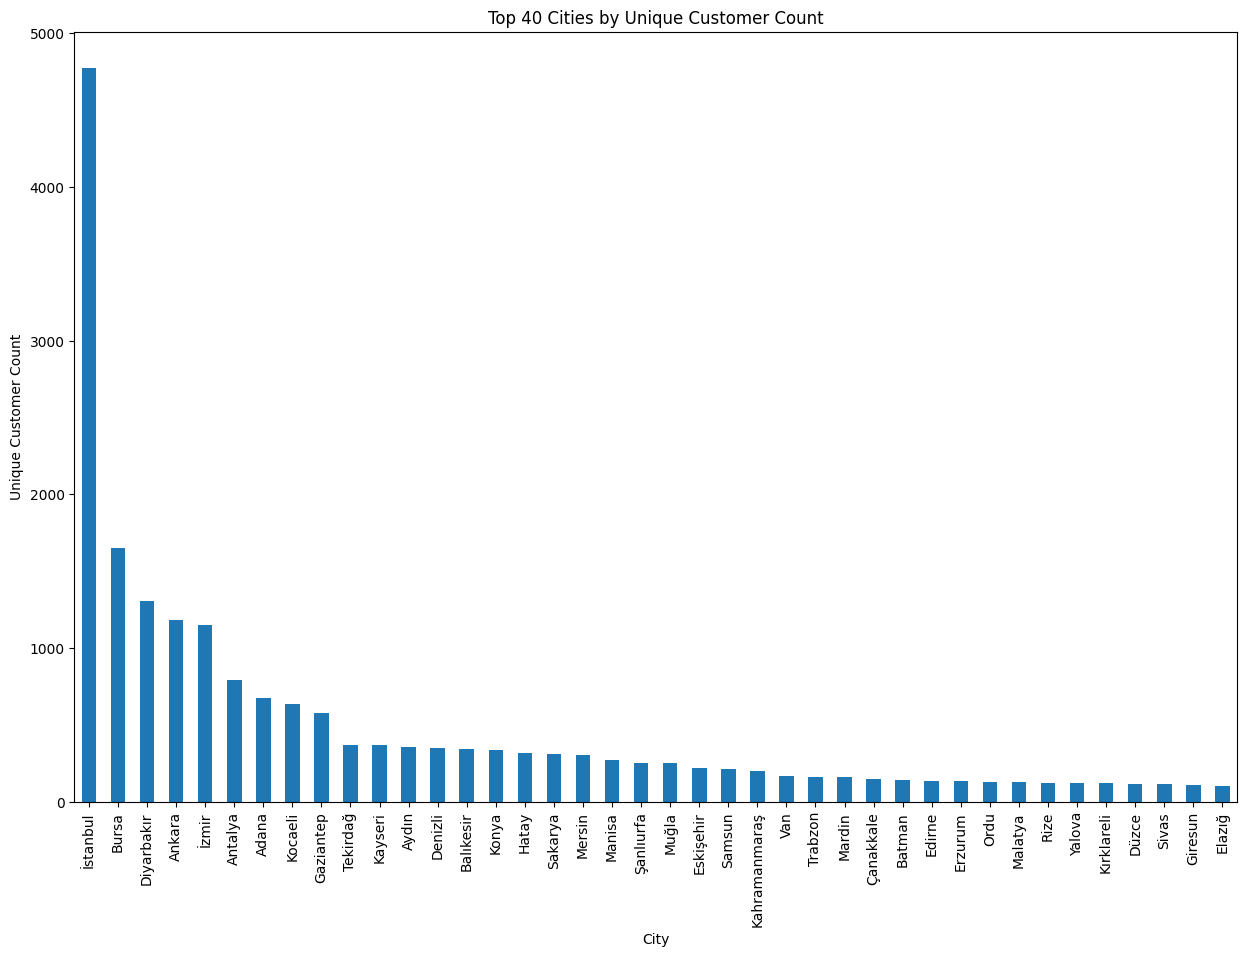

In [9]:
top_40_cities = data['CITY'].value_counts().head(40)
plt.figure(figsize=(15, 10))
top_40_cities.plot(kind='bar')
plt.title('Top 40 Cities by Unique Customer Count')
plt.xlabel('City')
plt.ylabel('Unique Customer Count')
plt.xticks(rotation=90)
plt.show()

Plot the Conversion for Each Month of the Data

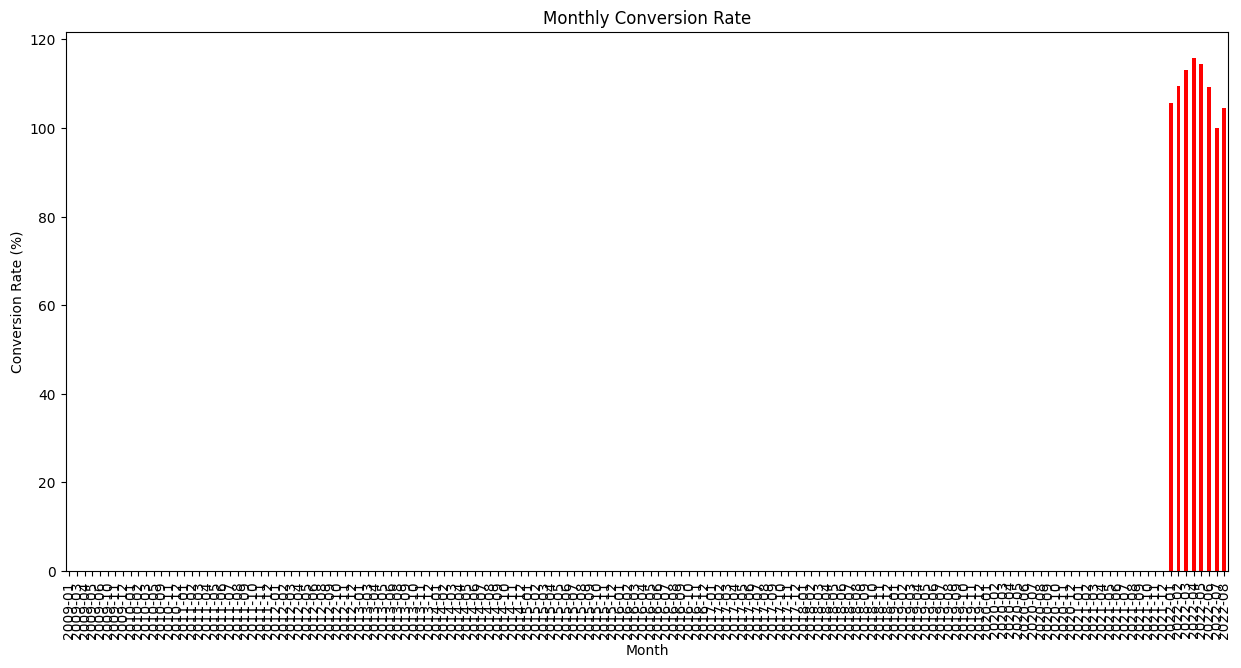

In [10]:
data['REGISTRATION_MONTH'] = data['REGISTRATION_DATE'].dt.to_period('M')
data['DEPOSIT_MONTH'] = data['DEPOSIT_DATE'].dt.to_period('M')
monthly_registrations = data.groupby('REGISTRATION_MONTH')['IDCUSTOMER'].nunique()
monthly_first_deposits = data.groupby('DEPOSIT_MONTH')['IDCUSTOMER'].nunique()
conversion_rate = (monthly_first_deposits / monthly_registrations) * 100

plt.figure(figsize=(15, 7))
conversion_rate.plot(kind='bar', color='red')
plt.title('Monthly Conversion Rate')
plt.xlabel('Month')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=90)
plt.show()

Calculate the Conversion Rate in June 2022

In [11]:
june_2022_conversion_rate = conversion_rate['2022-06']
print(f"Conversion rate in June 2022: {june_2022_conversion_rate:.2f}%")

Conversion rate in June 2022: 109.33%


Generate Additional Columns and Descriptive Statistics

In [12]:
df_ft = data.copy()

# Week of Day Column from Deposit Date
df_ft['Weekday'] = df_ft['DEPOSIT_DATE'].dt.day_name()

Descriptive Statistics

In [13]:
descriptive_stats = df_ft.describe()

First Deposit Amount Binned in Bins of 500

In [14]:
bins = [0, 500, 1000, 1500, 2000, 2500]
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500']
df_ft['Deposit Amount Bin'] = pd.cut(df_ft['FIRST_DEPOSIT_AMOUNT'], bins=bins, labels=labels, right=False)


7 Days Moving Average of Number of Registrations

In [15]:
registrations_by_date = data.groupby(data['REGISTRATION_DATE'].dt.date).size()
moving_average_7_days = registrations_by_date.rolling(window=7).mean()

Display results

In [16]:
print(descriptive_stats)
print(df_ft.head())
print(moving_average_7_days.head())

         IDCUSTOMER  FIRST_DEPOSIT_AMOUNT              REGISTRATION_DATE  \
count  2.206500e+04          22065.000000                          22065   
mean   1.380593e+08            284.806530  2022-01-20 00:15:59.347382784   
min    5.075649e+06              0.380000            2009-01-10 00:00:00   
25%    1.459097e+08             70.000000            2022-02-11 00:00:00   
50%    1.465139e+08            100.000000            2022-04-05 00:00:00   
75%    1.471483e+08            250.000000            2022-06-07 00:00:00   
max    1.478480e+08         100000.000000            2022-08-31 00:00:00   
std    3.272693e+07            943.993064                            NaN   

                        DEPOSIT_DATE  Customer Lifetime  
count                          22065       22065.000000  
mean   2022-04-21 08:52:32.141400576          91.358713  
min              2022-01-01 00:00:00           0.000000  
25%              2022-02-26 00:00:00           0.000000  
50%              2022-04-

Save plots as files

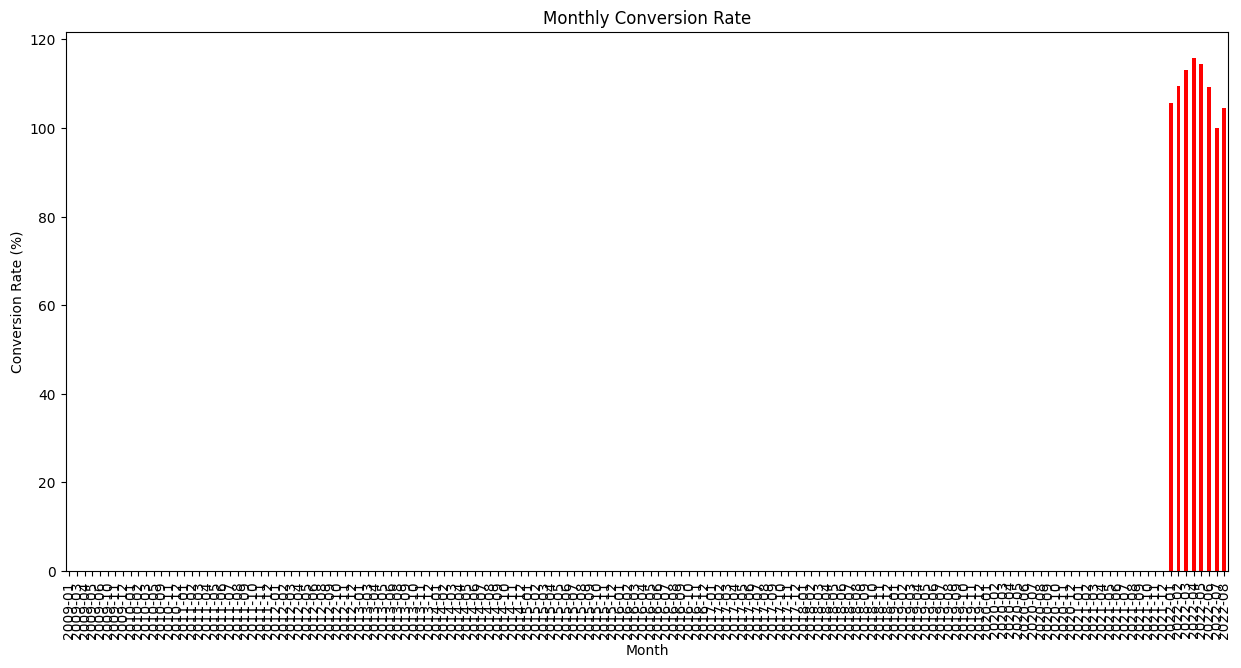

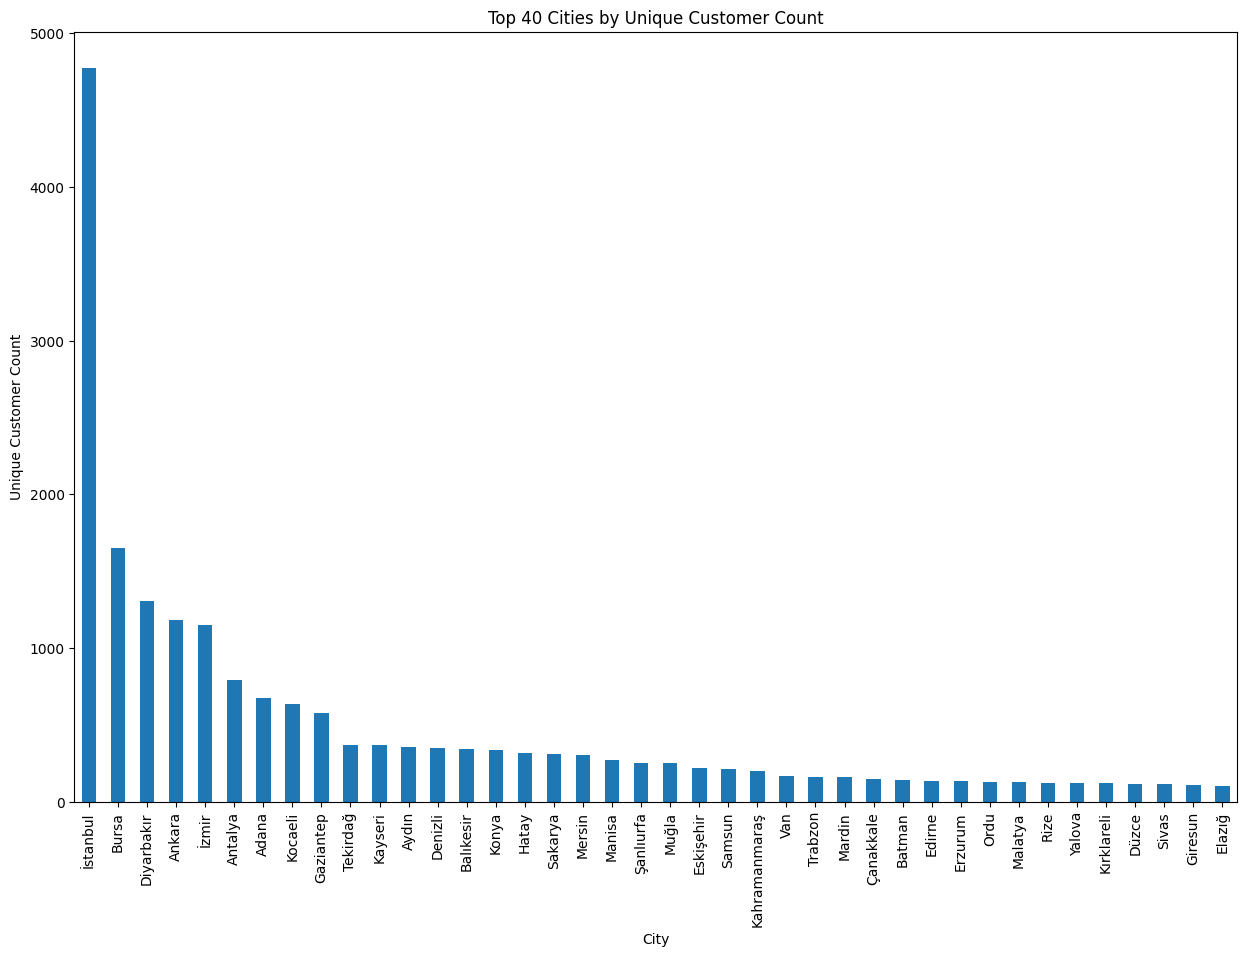

In [17]:
plt.figure(figsize=(15, 7))
conversion_rate.plot(kind='bar', color='red')
plt.title('Monthly Conversion Rate')
plt.xlabel('Month')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=90)
plt.savefig('monthly_conversion_rate.png')

plt.figure(figsize=(15, 10))
top_40_cities.plot(kind='bar')
plt.title('Top 40 Cities by Unique Customer Count')
plt.xlabel('City')
plt.ylabel('Unique Customer Count')
plt.xticks(rotation=90)
plt.savefig('top_40_cities_unique_customers.png')